In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [201]:
"""
<EDA>
      성공 프로젝트의 평균 % 
      실패 프로젝트의 평균 %
      진행 중 제외하고, 성공/실패 비율 (실패가 충분하지 않아서 잘 안 나올수도)
      실패한 프로젝트의 카테고리별 비율, 제목 글자 수 평균, 인트로 소개 글자 수 평균
`      성공한 프로젝트의 카테고리별 비율, 제목 글자 수 평균, 인트로 소개 글자 수 평균

   <분석>
      카테고리와 성공/실패가 연관있는지 상관분석   
      제목 글자수 평균, 인트로 소개 글자수 평균이 성공/실패와 연관있는지 상관분석
      목표금액이 성공/실패와 연관있는지 상관분석
      .....등등

      위를 기반으로 회귀분석
      
      !!! 제목, 인트로 소개가 성공/실패와 연관있고, 유의하면 좋을 듯

예측
   <전처리>
      제목을 RNN으로 돌릴 수 있도록 전처리
      인트로 소개를 RNN으로 돌릴 수 있도록 전처리
   <RNN>
"""

'\n<EDA>\n      성공 프로젝트의 평균 % \n      실패 프로젝트의 평균 %\n      진행 중 제외하고, 성공/실패 비율 (실패가 충분하지 않아서 잘 안 나올수도)\n      실패한 프로젝트의 카테고리별 비율, 제목 글자 수 평균, 인트로 소개 글자 수 평균\n`      성공한 프로젝트의 카테고리별 비율, 제목 글자 수 평균, 인트로 소개 글자 수 평균\n\n   <분석>\n      카테고리와 성공/실패가 연관있는지 상관분석   \n      제목 글자수 평균, 인트로 소개 글자수 평균이 성공/실패와 연관있는지 상관분석\n      목표금액이 성공/실패와 연관있는지 상관분석\n      .....등등\n\n      위를 기반으로 회귀분석\n      \n      !!! 제목, 인트로 소개가 성공/실패와 연관있고, 유의하면 좋을 듯\n\n예측\n   <전처리>\n      제목을 RNN으로 돌릴 수 있도록 전처리\n      인트로 소개를 RNN으로 돌릴 수 있도록 전처리\n   <RNN>\n'

In [202]:
df = pd.read_csv("data/Byeonghap_final5.csv", index_col = 0)

In [203]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN
4,인형의 시간들,출판,727000,36,2019400,29,NaN
...,...,...,...,...,...,...,...
9590,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트
9591,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈
9592,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>"
9593,함께 행복하개! 유기견 팔찌,캐릭터 · 굿즈,865000,173,5000,45,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.


### 성공/실패별 평균 달성 %

In [204]:
df1 =df[(df['percentage']>=100)] # 성공 갯수

# 성공 평균 %
mean_df = df1['percentage'].mean()
print("성공 평균:", mean_df)

성공 평균: 790.7211588745947


In [205]:
df2 =df[(df['percentage']<100)]  #실패 갯수 

# 실패 평균 %
mean_df = df2['percentage'].mean()
print("실패 평균:",mean_df)

실패 평균: 27.879194630872483


### 성공한 프로젝트의 카테고리별 비율

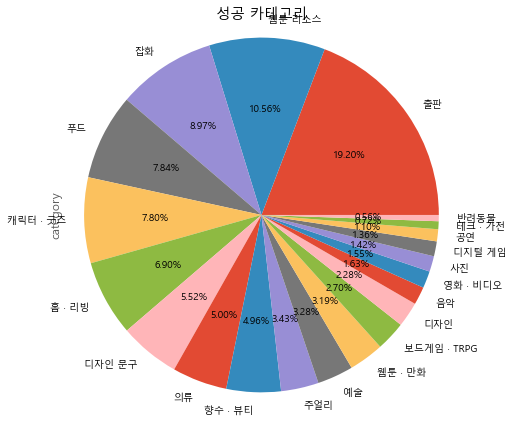

In [206]:
df3 =df1['category'].astype('category') #성공 카테고리 비율

df3


df3.values.categories

df5 = df3.value_counts()
df5.plot.pie(autopct='%.2f%%')
plt.title("성공 카테고리")
plt.axis('equal')
plt.show()

### 실패한 프로젝트의 카테고리별 비율

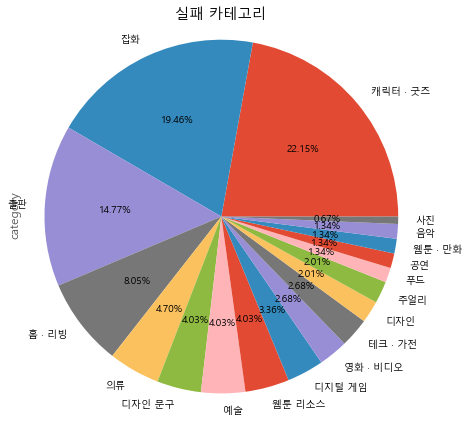

In [207]:
df4 =df2['category'].astype('category') #실패 카테고리 비율

df4

df4.values.categories


df6 = df4.value_counts()
df6.plot.pie(autopct='%.2f%%')
plt.title("실패 카테고리")
plt.axis('equal')
plt.show()

In [208]:
# 인덱스 순서대로 다시 설정

index = [i for i in range(len(df))]
index

df["index"] = index

df = df.set_index("index")
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description
index,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN
4,인형의 시간들,출판,727000,36,2019400,29,NaN
...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>"


### 성공/실패별 카테고리

In [209]:
# 결과 컬럼 추가 : 성사 - 1 , 실패 - 0

df["result"] = 3   # 아무값이나 해서 컬럼 생성

for i in range(len(df["percentage"])):
    if df["percentage"][i] >= 100:
        df["result"][i] = 1
    else: 
        df["result"][i] = 0

In [210]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result
index,,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN,0
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN,0
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN,0
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN,0
4,인형의 시간들,출판,727000,36,2019400,29,NaN,0
...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1


1    9561
0     149
Name: result, dtype: int64

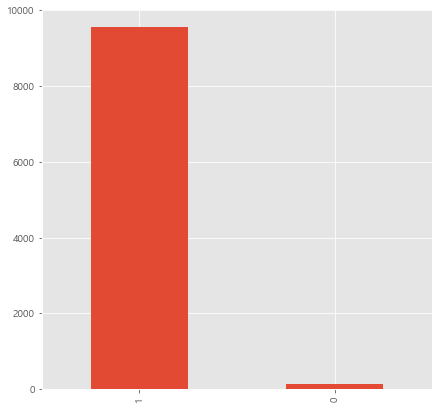

In [211]:
df["result"].value_counts().plot(kind="bar")
df["result"].value_counts()

<AxesSubplot:>

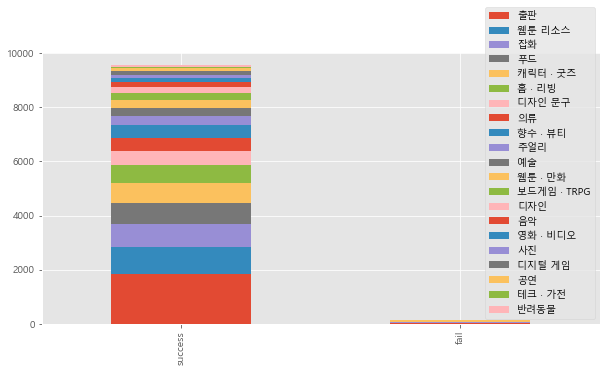

In [212]:
# 성공/실패별 카테고리

success = df[df["result"] == 1]["category"].value_counts()  
fail = df[df["result"] == 0]["category"].value_counts()  

df_category = pd.DataFrame([success, fail])  
df_category.index = ["success", "fail"]

df_category.plot(kind = "bar", stacked = True, figsize = (10, 5))   # figsize : 그래프 사이즈

### 성공 프로젝트의 제목/인트로 평균 글자 수

In [213]:
success = df1[["title", "description"]]
success.head()

,title,description
0,웹툰과 일러스트를 위한 꽃브러쉬,웹툰과 일러스트에 사용할수있는 꽃소재입니다.
1,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,많은 사랑을 받았던 네이버웹툰 <고래별> 오디오웹툰 펀딩이 시즌2로 돌아옵니다!
2,꼬마마법사 레미 공식 한정판 굿즈,방영 20주년 기념 '꼬마마법사 레미' 공식 한정판 굿즈를 소개합니다!
3,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,1억1천400만원을 모으겠어! 노동탈출 금융에세이 <자산소득으로 생활하기 프로젝트>...
4,"당신을 지켜주는 영물, '메롱해치 자수 KIT'",메롱해치 자수 키트는 쉽게 프랑스 자수를 배울 수 있는 키트입니다.


In [214]:
title_mean = success['제목 글자 수']= success.title.str.count('')
intro_mean = success['인트로 소개 글자 수']= success.description.str.count('')
success

,title,description,제목 글자 수,인트로 소개 글자 수
0,웹툰과 일러스트를 위한 꽃브러쉬,웹툰과 일러스트에 사용할수있는 꽃소재입니다.,18,25
1,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,많은 사랑을 받았던 네이버웹툰 <고래별> 오디오웹툰 펀딩이 시즌2로 돌아옵니다!,31,45
2,꼬마마법사 레미 공식 한정판 굿즈,방영 20주년 기념 '꼬마마법사 레미' 공식 한정판 굿즈를 소개합니다!,19,40
3,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,1억1천400만원을 모으겠어! 노동탈출 금융에세이 <자산소득으로 생활하기 프로젝트>...,30,51
4,"당신을 지켜주는 영물, '메롱해치 자수 KIT'",메롱해치 자수 키트는 쉽게 프랑스 자수를 배울 수 있는 키트입니다.,27,38
...,...,...,...,...
9590,메카피아의 한국 전통 자개 문양 피젯 스피너,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,25,44
9591,카프카 <변신> 초판본과 독서카드,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,19,30
9592,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",30,50
9593,함께 행복하개! 유기견 팔찌,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.,16,49


In [215]:
print("성공 title 평균 글자 수:",title_mean.mean())
print("성공 intro 평균 글자 수:",intro_mean.mean())

성공 title 평균 글자 수: 26.323710908900743
성공 intro 평균 글자 수: 41.829620332601195


### 실패 프로젝트의 제목/인트로 평균 글자 수

In [216]:
fail = df2[["title", "description"]]
fail.head()

,title,description
0,"짐볼로 만든 인형, '돌리볼리'",NaN
1,"함께 만드는 악기 전문 웹진, <The Strings>",NaN
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,NaN
3,마다가스카르 사진전,NaN
4,인형의 시간들,NaN


In [217]:
title_mean2 = fail['제목 글자 수']= fail.title.str.count('')
intro_mean2 = fail['인트로 소개 글자 수']= fail.description.str.count('')
fail

,title,description,제목 글자 수,인트로 소개 글자 수
0,"짐볼로 만든 인형, '돌리볼리'",NaN,18,NaN
1,"함께 만드는 악기 전문 웹진, <The Strings>",NaN,31,NaN
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,NaN,28,NaN
3,마다가스카르 사진전,NaN,11,NaN
4,인형의 시간들,NaN,8,NaN
...,...,...,...,...
144,스케치업 웹툰 배경 - 중세 산골마을/판타지,NaN,25,NaN
145,편안하고 자연스러운 조끼형브라 '꿈브라',NaN,23,NaN
146,백화점에서 줄서서 먹던 스콘의 친환경 B대면 DIY 키트,NaN,32,NaN
147,'해마’와 ‘날개하늘나리’에게 내일을 선물해 주세요.,NaN,30,NaN


In [218]:
print("실패 title 평균 글자 수:",title_mean2.mean())
print("실패 intro 평균 글자 수:",intro_mean2.mean())

실패 title 평균 글자 수: 23.825503355704697
실패 intro 평균 글자 수: nan


### 성공/실패별 제목길이 분포

In [219]:
df_title_len = df
df_title_len['title_len']= df.title.str.count('')
df_title_len

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result,title_len
index,,,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN,0,18
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN,0,31
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN,0,28
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN,0,11
4,인형의 시간들,출판,727000,36,2019400,29,NaN,0,8
...,...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1,25
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1,19
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1,30


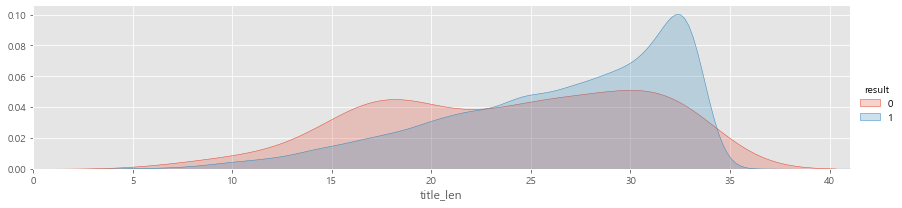

In [220]:
facet = sns.FacetGrid(df_title_len, hue = "result", aspect = 4)     
facet.map(sns.kdeplot, "title_len", shade = True)
facet.add_legend()                              
facet.set(xlim = (0, df_title_len["title_len"].max())) 

##### 성공한 프로젝트의 제목길이는 30 ~35이 가장 많은 비율
##### 실패 프로젝트의 제목길이는 28이 가장 많은 비율

### 성공/실패별 인트로 길이 분포

In [221]:
df_intro_len = df
df_intro_len['intro_len']= df.description.str.count('')
df_intro_len

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result,title_len,intro_len
index,,,,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN,0,18,NaN
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN,0,31,NaN
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN,0,28,NaN
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN,0,11,NaN
4,인형의 시간들,출판,727000,36,2019400,29,NaN,0,8,NaN
...,...,...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1,25,44.0
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1,19,30.0
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1,30,50.0


(10.0, 65.0)

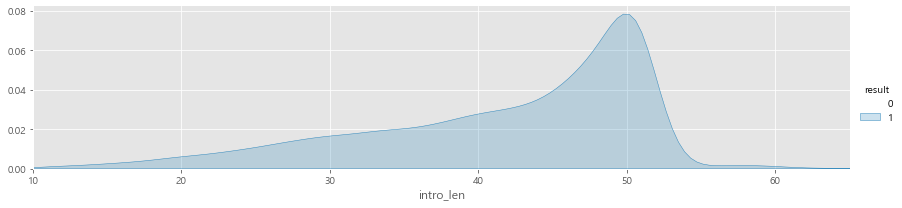

In [222]:
facet = sns.FacetGrid(df_intro_len, hue = "result", aspect = 4)     
facet.map(sns.kdeplot, "intro_len", shade = True)
facet.add_legend()                              
facet.set(xlim = (0, df_intro_len["intro_len"].max())) 
plt.xlim(10,65)

##### 성공 프로젝트의 인트로는  10 글자부터 존재, 50글자가 대부분
##### 실패 프로젝트의 인트로는  25 글자부터 존재, 50글자가 대부분  --> 인트로가 길다?

### 성공/실패별 목표금액 분포

(0.0, 10000000.0)

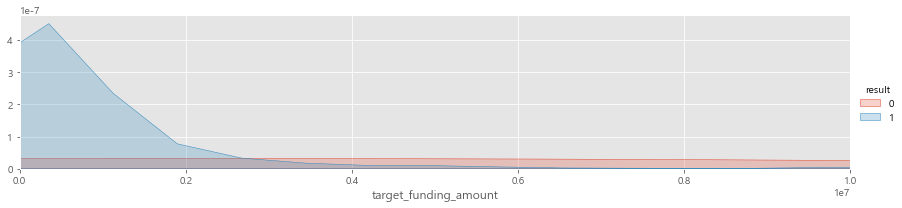

In [223]:
facet = sns.FacetGrid(df, hue = "result", aspect = 4)     
facet.map(sns.kdeplot, "target_funding_amount", shade = True)
facet.add_legend()                              
facet.set(xlim = (0, df["target_funding_amount"].max()))  
plt.xlim(0,10000000) 

##### 성공한 프로젝트는 목표금액이 대부분 2000000(2e6)원, 즉 2백만원 이하로 많이 설정하였음
##### 실패한 프로젝트는 (실패프로젝트 데이터 더 넣은 후 쓰기)

### 성공 % 분포

(100.0, 2000.0)

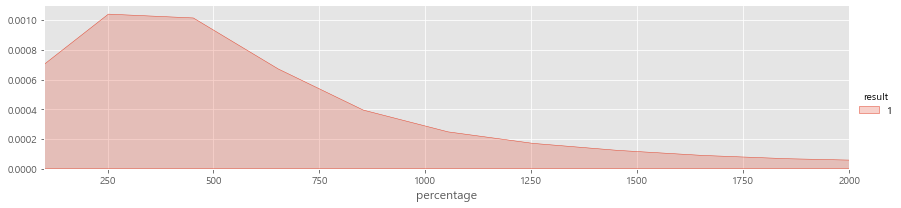

In [224]:
# 얼마나 초과달성했는지

facet = sns.FacetGrid(df[df["result"] == 1], hue = "result", aspect = 4)     # hue: 색 지정 / aspect : 그래프 폭 지정
facet.map(sns.kdeplot, "percentage", shade = True)
facet.add_legend()                              # 범례
facet.set(xlim = (0, df["percentage"].max()))  
plt.xlim(100,2000)

##### 성공한 프로젝트들 대부분은 100% ~ 1000% 달성
##### 그 중 500% 달성 비율 높다

## EDA 결과 정리

#### 성공/실패별 프로젝트 평균 성사율 %

+ 성공 평균: 790.7211588745947
    + 성공한 프로젝트들 대부분은 100% ~ 1000% 사이 달성
    + 250~500% 달성한 비율이 가장 높다
+ 실패 평균: 27.879194630872483

#### 성공/실패별 카테고리
+ 성공: 출판 > 웹툰,리소스 > 잡화
+ 실패: 캐릭터/굿즈 > 잡화 > 출판 

#### 성공/실패별 평균 title 글자 수
+ 성공 title 평균 글자 수: 26.323710908900743
    + 성공한 프로젝트의 제목길이는 (33글자에서 가장 많은 비율)
+ 실패 title 평균 글자 수: 23.825503355704697
    + 실패한 프로젝트의 제목길이는 17 ~32이 가장 많은 비율 (의미가 없는거같음...)

#### 성공/실패별 평균 intro 글자 수
+ 성공 intro 평균 글자 수: 41.829620332601195
    + 성공 프로젝트의 인트로는  10 글자부터 존재, 50글자가 대부분 (50글자에서..가장많은 분포) 
+ 실패 intro 평균 글자 수: Nan

#### 성공/실패별 목표금액 
+ 성공 프로젝트는 2백만원 이하로 많이 설정


#### 데이터로 봤을때
+ 제목길이는 33글자 ,인트로는 50글자에서 가장 성공을 많이함..

In [225]:
##### CheckPoint 

df_intro_len.to_csv("data/tumblrbuck1.csv", encoding = "utf-8")

In [226]:
df_intro_len = pd.read_csv("data/tumblrbuck1.csv", index_col = 0)
df_intro_len

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result,title_len,intro_len
index,,,,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN,0,18,NaN
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN,0,31,NaN
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN,0,28,NaN
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN,0,11,NaN
4,인형의 시간들,출판,727000,36,2019400,29,NaN,0,8,NaN
...,...,...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1,25,44.0
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1,19,30.0
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1,30,50.0
